In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2019_avengers_endgame_critic.csv to 2019_avengers_endgame_critic.csv


In [ ]:
import pandas as pd

df = pd.read_csv("2019_avengers_endgame_critic.csv")
df.head()

,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,reviewId,scoreSentiment,originalScore
0,2018-11-05,Brian Gill,/critics/brian-gill,fresh,True,False,False,False,/critics/source/3256,Mad About Movies Podcast,http://madaboutmoviespodcast.com/episodes/2019...,"Endgame works very, very well as a movie, as a...",2528423,POSITIVE,A+
1,2019-04-23,Yago García,/critics/yago-garcia,fresh,True,False,False,False,/critics/source/2689,Cinemanía (Spain),https://www.cinemania.es/peliculas/vengadores-...,This decade with the costumed adventurers has ...,2579859,POSITIVE,4.5/5
2,2019-04-23,Eric Kohn,/critics/eric-kohn,fresh,True,False,False,True,/critics/source/226,indieWire,https://www.indiewire.com/2019/04/avengers-end...,"As ""Endgame"" sputters to the finish line, it l...",2579858,POSITIVE,B-
3,2019-04-23,Jason Gorber,/critics/jason-gorber,fresh,True,False,False,False,/critics/source/2983,HighDef Digest,https://www.highdefdigest.com/blog/avengers-en...,Spectacle gives way to heroic journeys fulfill...,2579855,POSITIVE,B+
4,2019-04-23,EJ Moreno,/critics/ej-moreno,fresh,True,False,False,False,/critics/source/2936,Flickering Myth,https://www.flickeringmyth.com/2019/04/video-r...,"Rarely do event movies live up to the hype, bu...",2579853,POSITIVE,NaN


In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['cleaned_quote'] = df['quote'].apply(preprocess)
df[['quote', 'cleaned_quote']].head()

,quote,cleaned_quote
0,"Endgame works very, very well as a movie, as a...",endgame works movie theme park ride experience...
1,This decade with the costumed adventurers has ...,decade costumed adventurers worth review spanish
2,"As ""Endgame"" sputters to the finish line, it l...",endgame sputters finish line leaves impression...
3,Spectacle gives way to heroic journeys fulfill...,spectacle gives way heroic journeys fulfilled ...
4,"Rarely do event movies live up to the hype, bu...",rarely event movies live hype avengers endgame...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_quote'])
y = df['scoreSentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 92.86%


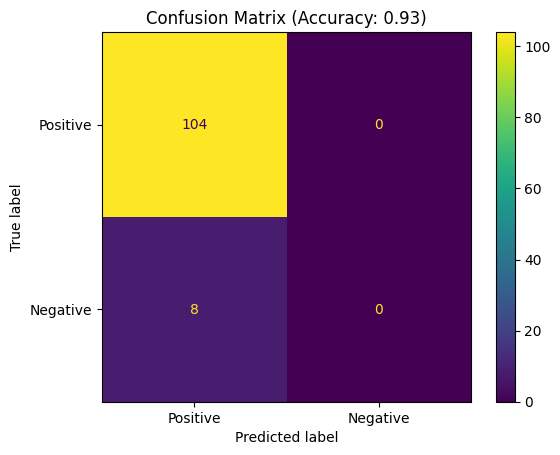

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["POSITIVE", "NEGATIVE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot()
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_quote'])
y = df['scoreSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes Accuracy: 0.9285714285714286


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

df['label'] = df['scoreSentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_quote'])

sequences = tokenizer.texts_to_sequences(df['cleaned_quote'])
padded = pad_sequences(sequences, maxlen=100, padding='post')

X = padded
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((10000, 100))
word_index = tokenizer.word_index
for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

--2025-05-02 03:30:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-02 03:30:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-02 03:30:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential([
    Embedding(input_dim=10000, output_dim=100, weights=[embedding_matrix], input_length=100, trainable=False),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
14/14 - 8s - 556ms/step - accuracy: 0.8356 - loss: 0.6762 - val_accuracy: 0.9286 - val_loss: 0.6524
Epoch 2/10
14/14 - 2s - 108ms/step - accuracy: 0.9414 - loss: 0.6278 - val_accuracy: 0.9286 - val_loss: 0.6029
Epoch 3/10
14/14 - 0s - 35ms/step - accuracy: 0.9414 - loss: 0.5756 - val_accuracy: 0.9286 - val_loss: 0.5513
Epoch 4/10
14/14 - 1s - 45ms/step - accuracy: 0.9414 - loss: 0.5228 - val_accuracy: 0.9286 - val_loss: 0.5005
Epoch 5/10
14/14 - 1s - 43ms/step - accuracy: 0.9414 - loss: 0.4713 - val_accuracy: 0.9286 - val_loss: 0.4538
Epoch 6/10
14/14 - 0s - 25ms/step - accuracy: 0.9414 - loss: 0.4242 - val_accuracy: 0.9286 - val_loss: 0.4124
Epoch 7/10
14/14 - 0s - 27ms/step - accuracy: 0.9414 - loss: 0.3832 - val_accuracy: 0.9286 - val_loss: 0.3769
Epoch 8/10
14/14 - 1s - 47ms/step - accuracy: 0.9414 - loss: 0.3481 - val_accuracy: 0.9286 - val_loss: 0.3480
Epoch 9/10
14/14 - 1s - 45ms/step - accuracy: 0.9414 - loss: 0.3188 - val_accuracy: 0.9286 - val_loss: 0.3256
Epoch 10

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Net Accuracy: {accuracy:.2%}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9173 - loss: 0.3238
Neural Net Accuracy: 92.86%
